<a href="https://colab.research.google.com/github/briandk/2020-virtual-program-in-data-science/blob/master/nobel_winners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

from plotnine import *

In [69]:
nobel_winners = pd.read_csv("https://github.com/briandk/2020-virtual-program-in-data-science/raw/master/data/nobel_winners.csv", parse_dates = ['prize_year'])

nobel_winners = nobel_winners.assign(birth_date = pd.to_datetime(nobel_winners['birth_date'], yearfirst = True))
nobel_winners = nobel_winners.assign(death_date = pd.to_datetime(nobel_winners['death_date'], yearfirst = True))
nobel_winners = nobel_winners.assign(age = nobel_winners['death_date'] - nobel_winners['birth_date'])
nobel_winners = nobel_winners.assign(age = nobel_winners['age'].astype('timedelta64[Y]'))
nobel_winners = nobel_winners.assign(prize_age = (nobel_winners['prize_year'] - nobel_winners['birth_date']).astype('timedelta64[Y]'))

 First, let's get an overall look at the data.

In [53]:
nobel_winners

,prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country,age,prize_age
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,58.0,17655 days
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,68.0,22571 days
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,63.0,17093 days
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,82.0,26535 days
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,90.0,28715 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2016-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaT,NaN,NaN,NaN,25893 days
965,2016-01-01,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaT,NaN,NaN,NaN,23520 days
966,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaT,NaN,NaN,NaN,29687 days
967,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaT,NaN,NaN,NaN,23485 days


How long does the average nobel prize-winner tend to live?

In [62]:
nobel_winners['age'].describe()

count    616.000000
mean      79.349026
std       10.730093
min       39.000000
25%       73.000000
50%       81.000000
75%       87.000000
max      103.000000
Name: age, dtype: float64

Wow! Most of the nobel laureates are in their 70s and 80s, but one person won it at age 39. Who was that?

In [63]:
nobel_winners[nobel_winners['age'] < 40]

,prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country,age,prize_age
374,1964-01-01,Peace,The Nobel Peace Prize 1964,NaN,1/1,524,Individual,Martin Luther King Jr.,1929-01-15,"Atlanta, GA",United States of America,Male,NaN,NaN,NaN,1968-04-04,"Memphis, TN",United States of America,39.0,12769 days


/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


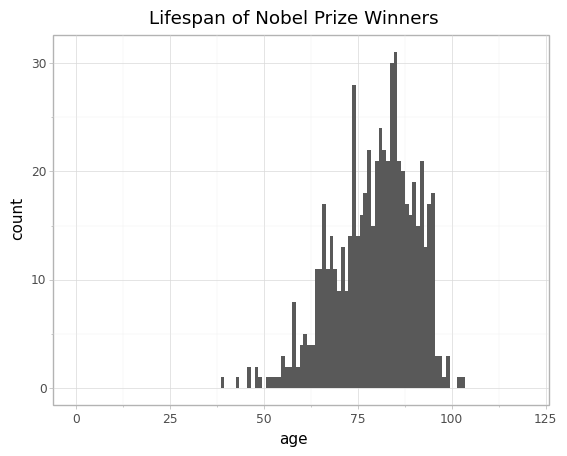

<ggplot: (8773449223926)>

In [66]:
(
    ggplot(
        aes(
            x = 'age'
        ),
        data = nobel_winners[['age']].dropna()
    ) +
    geom_histogram(binwidth = 1) +
    xlim([0, 120]) +
    theme_light() +
    ggtitle('Lifespan of Nobel Prize Winners')
)

So how does the age distribution break down by field?

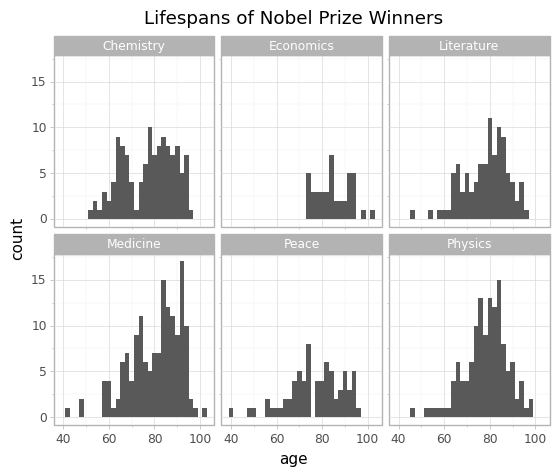

<ggplot: (-9223363263404440660)>

In [78]:
(
    ggplot(
        aes(
            x = 'age'
        ),
        data = nobel_winners[['age', 'category']].dropna()
    ) +
    geom_histogram(binwidth = 2) +
    facet_wrap('~ category') +
    theme_light() +
    ggtitle('Lifespans of Nobel Prize Winners')
)

Do the data look any better if we try to do a smoothed kernel density estimate?

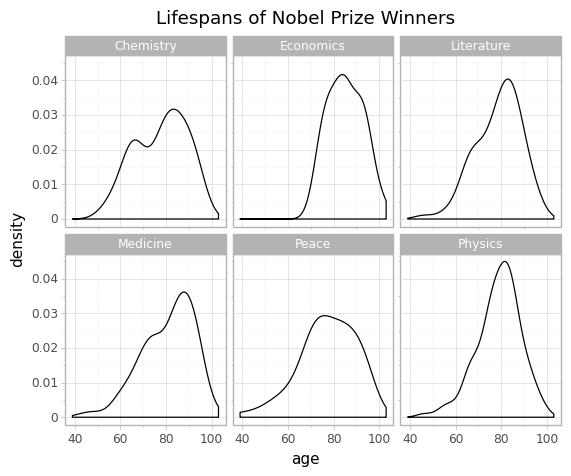

<ggplot: (8773449685375)>

In [79]:
(
    ggplot(
        aes(
            x = 'age'
        ),
        data = nobel_winners[['age', 'category']].dropna()
    ) +
    geom_density() +
    facet_wrap('~ category') +
    theme_light() +
    ggtitle('Lifespans of Nobel Prize Winners')
)

Now let's look at the age they were when they won the prize.

In [80]:
nobel_winners['prize_age'].describe()

count    938.000000
mean      58.485075
std       12.378601
min       16.000000
25%       49.000000
50%       59.000000
75%       68.000000
max       89.000000
Name: prize_age, dtype: float64

Who are among the youngest people to have ever been awarded the Nobel Prize? Or, more precisely, what have been the youngest ages at which Nobel Prizes were awarded?

In [81]:
(
    nobel_winners
      .sort_values('prize_age')
      .dropna()
      .head(n = 10))

,prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country,age,prize_age
86,1915-01-01,Physics,The Nobel Prize in Physics 1915,"""for their services in the analysis of crystal...",1/2,21,Individual,William Lawrence Bragg,1890-03-31,Adelaide,Australia,Male,Victoria University,Manchester,United Kingdom,1971-07-01,Ipswich,United Kingdom,81.0,24.0
169,1932-01-01,Physics,The Nobel Prize in Physics 1932,"""for the creation of quantum mechanics, the ap...",1/1,38,Individual,Werner Karl Heisenberg,1901-12-05,Würzburg,Germany,Male,Leipzig University,Leipzig,Germany,1976-02-01,Munich,West Germany (Germany),74.0,30.0
194,1936-01-01,Physics,The Nobel Prize in Physics 1936,"""for his discovery of the positron""",1/2,43,Individual,Carl David Anderson,1905-09-03,"New York, NY",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1991-01-11,"San Marino, CA",United States of America,85.0,30.0
174,1933-01-01,Physics,The Nobel Prize in Physics 1933,"""for the discovery of new productive forms of ...",1/2,40,Individual,Paul Adrien Maurice Dirac,1902-08-08,Bristol,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,1984-10-20,"Tallahassee, FL",United States of America,82.0,30.0
116,1923-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1923,"""for the discovery of insulin""",1/2,313,Individual,Frederick Grant Banting,1891-11-14,Alliston,Canada,Male,University of Toronto,Toronto,Canada,1941-02-21,Newfoundland,Canada,49.0,31.0
324,1958-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1958,"""for his discoveries concerning genetic recomb...",1/2,366,Individual,Joshua Lederberg,1925-05-23,"Montclair, NJ",United States of America,Male,University of Wisconsin,"Madison, WI",United States of America,2008-02-02,"New York, NY",United States of America,82.0,32.0
343,1960-01-01,Physics,The Nobel Prize in Physics 1960,"""for the invention of the bubble chamber""",1/1,74,Individual,Donald Arthur Glaser,1926-09-21,"Cleveland, OH",United States of America,Male,University of California,"Berkeley, CA",United States of America,2013-02-28,"Berkeley, CA",United States of America,86.0,33.0
82,1914-01-01,Physics,The Nobel Prize in Physics 1914,"""for his discovery of the diffraction of X-ray...",1/1,19,Individual,Max von Laue,1879-10-09,Pfaffendorf,Germany,Male,Frankfurt-on-the-Main University,Frankfurt-on-the-Main,Germany,1960-04-23,Berlin,West Germany (Germany),80.0,34.0
56,1909-01-01,Physics,The Nobel Prize in Physics 1909,"""in recognition of their contributions to the ...",1/2,13,Individual,Guglielmo Marconi,1874-04-25,Bologna,Italy,Male,Marconi Wireless Telegraph Co. Ltd.,London,United Kingdom,1937-07-20,Rome,Italy,63.0,34.0
182,1935-01-01,Chemistry,The Nobel Prize in Chemistry 1935,"""in recognition of their synthesis of new radi...",1/2,193,Individual,Frédéric Joliot,1900-03-19,Paris,France,Male,Institut du Radium,Paris,France,1958-08-14,Paris,France,58.0,34.0


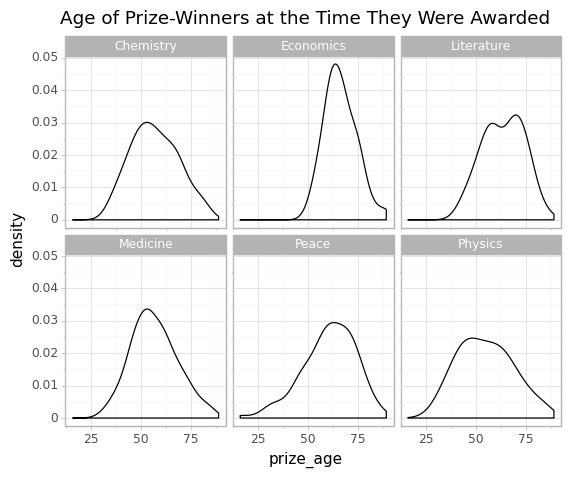

<ggplot: (8773449110711)>

In [82]:
(
    ggplot(
        aes(
            x = 'prize_age'
        ),
        data = nobel_winners[['prize_age', 'category']].dropna()
    ) +
    geom_density() +
    facet_wrap('~ category') +
    theme_light() +
    ggtitle('Age of Prize-Winners at the Time They Were Awarded')
)

Has anyone won the Nobel Prize more than once?

In [88]:
nobel_winners.groupby('full_name').count().sort_values('prize_year', ascending = False).head(n = 10)

,prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country,age,prize_age
full_name,,,,,,,,,,,,,,,,,,,
Jack W. Szostak,3,3,3,3,3,3,3,3,3,3,3,3,2,2,0,0,0,0,3
Comité international de la Croix Rouge (International Committee of the Red Cross),3,3,3,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0
"Marie Curie, née Sklodowska",2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2
Johann Deisenhofer,2,2,2,2,2,2,2,2,2,2,2,2,1,1,0,0,0,0,2
Stefan W. Hell,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,2
Werner Forssmann,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2
Paul Modrich,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,2
Martin Karplus,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,2
Günter Blobel,2,2,2,2,2,2,2,2,2,2,2,2,1,1,0,0,0,0,2


☝️ Hmm, that doesn't seem quite right. Not to brag, but you'd kind of think if Jack W. Szostak had won the Nobel prize 3 times, his name would be more familiar. Let's investigate.

In [89]:
nobel_winners[nobel_winners['full_name'] == "Jack W. Szostak"]

,prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country,age,prize_age
863,2009-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of how chromosomes are prot...",1/3,837,Individual,Jack W. Szostak,1952-11-09,London,United Kingdom,Male,Harvard Medical School,"Boston, MA",United States of America,NaT,NaN,NaN,NaN,56.0
864,2009-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of how chromosomes are prot...",1/3,837,Individual,Jack W. Szostak,1952-11-09,London,United Kingdom,Male,Massachusetts General Hospital,"Boston, MA",United States of America,NaT,NaN,NaN,NaN,56.0
865,2009-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of how chromosomes are prot...",1/3,837,Individual,Jack W. Szostak,1952-11-09,London,United Kingdom,Male,Howard Hughes Medical Institute,NaN,NaN,NaT,NaN,NaN,NaN,56.0


According to [nobelprize.org][1], the 2009 prize in medicine was shared three ways between Elizabeth H. Blackburn, Carol W. Greider, and Jack W. Szostak.

It's possible that there are one or more errors lurking in this dataset. Given that Szostak appears three times, we might check to make sure Greider and Blackburn also appear

[1]: https://www.nobelprize.org/prizes/medicine/2009/summary/

In [97]:
nobel_winners[(nobel_winners['prize_year'] == pd.to_datetime('2009')) & (nobel_winners['category'] == "Medicine")]

,prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country,age,prize_age
861,2009-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of how chromosomes are prot...",1/3,835,Individual,Elizabeth H. Blackburn,1948-11-26,"Hobart, Tasmania",Australia,Female,University of California,"San Francisco, CA",United States of America,NaT,NaN,NaN,NaN,60.0
862,2009-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of how chromosomes are prot...",1/3,836,Individual,Carol W. Greider,1961-04-15,"San Diego, CA",United States of America,Female,Johns Hopkins University School of Medicine,"Baltimore, MD",United States of America,NaT,NaN,NaN,NaN,47.0
863,2009-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of how chromosomes are prot...",1/3,837,Individual,Jack W. Szostak,1952-11-09,London,United Kingdom,Male,Harvard Medical School,"Boston, MA",United States of America,NaT,NaN,NaN,NaN,56.0
864,2009-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of how chromosomes are prot...",1/3,837,Individual,Jack W. Szostak,1952-11-09,London,United Kingdom,Male,Massachusetts General Hospital,"Boston, MA",United States of America,NaT,NaN,NaN,NaN,56.0
865,2009-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of how chromosomes are prot...",1/3,837,Individual,Jack W. Szostak,1952-11-09,London,United Kingdom,Male,Howard Hughes Medical Institute,NaN,NaN,NaT,NaN,NaN,NaN,56.0


It's subtle, but it looks like what's different about each time Szostak appears in the data is the `organization_name`. Each row lists a distinct organization for him:

- Harvard Medical School
- Massachusetts General Hospital
- Howard Hughes Medical Institute

Unfortunately, that may mean that our analysis is flawed, because we assumed each prize-winner would appear once per prize they won. We know, for example, that Jack W. Szostak only won the prize once, while Linus Pauling and Marie Curie both won the prize twice.

In [100]:
nobel_winners[nobel_winners['full_name'].str.contains('Curie')]

,prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country,age,prize_age
18,1903-01-01,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,5,Individual,Pierre Curie,1859-05-15,Paris,France,Male,École municipale de physique et de chimie indu...,Paris,France,1906-04-19,Paris,France,46.0,43.0
19,1903-01-01,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,66.0,35.0
63,1911-01-01,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,66.0,43.0
183,1935-01-01,Chemistry,The Nobel Prize in Chemistry 1935,"""in recognition of their synthesis of new radi...",1/2,194,Individual,Irène Joliot-Curie,1897-09-12,Paris,France,Female,Institut du Radium,Paris,France,1956-03-17,Paris,France,58.0,37.0


In [101]:
nobel_winners[nobel_winners['full_name'].str.contains('Pauling')]

,prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country,age,prize_age
289,1954-01-01,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,93.0,52.0
357,1962-01-01,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,93.0,60.0
